In [1]:
#Custom estimators:

#importing libraries
import pandas as pd
import numpy as np

#importing scikit
from sklearn.datasets import fetch_california_housing

In [12]:
#getting the data

data = fetch_california_housing()
X = data['data']
Y = data['target']
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [13]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [17]:
#to build an outlier estimator

from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_lower = q_lower
        self.q_upper = q_upper

In [27]:
#defining class
class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_upper = q_upper
        self.q_lower = q_lower
        
# defining fit function which will give us the values required to replace outlier values


    def fit(self,X,y=None):
        self.upper = np.percentile(X, self.q_upper, axis=0)
        self.lower = np.percentile(X, self.q_lower, axis=0)
        return self     
    
#hence a method called fit has been created and can be called after instantiating

#defining the transform function 
    def transform(self, X):
        Xt = X.copy()
        index_lower = X < self.lower
        index_upper = X > self.upper
        
        for i in range(X.shape[-1]):
            Xt[index_lower[:, i], i] = self.lower[i]
            Xt[index_upper[:, i], i] = self.upper[i]
            
        return Xt
    
# Xt is returned because outliers are replaced and not eradicated.

In [28]:
#these methods will replace the outlier values and not erase them. It just replaces them in original memory.

replace = OutlierReplacer(5, 95)
replace_copy = replace.fit(X)

#printing results
print(replace)
print(replace_copy)


print(replacer is replacer_copy)
print(id(replacer) == id(replacer_copy))



OutlierReplacer(q_lower=5, q_upper=95)
OutlierReplacer(q_lower=5, q_upper=95)
True
True


In [30]:

#creating and fitting transformer object and transforming the data
Xt = replace.transform(X)
print(Xt)

[[   7.300305     41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   7.300305     21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            7.64024655 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    38.96       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    38.96       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    38.96       -121.24      ]]


In [36]:
#plotting results and visualizing

import matplotlib.pyplot as plt


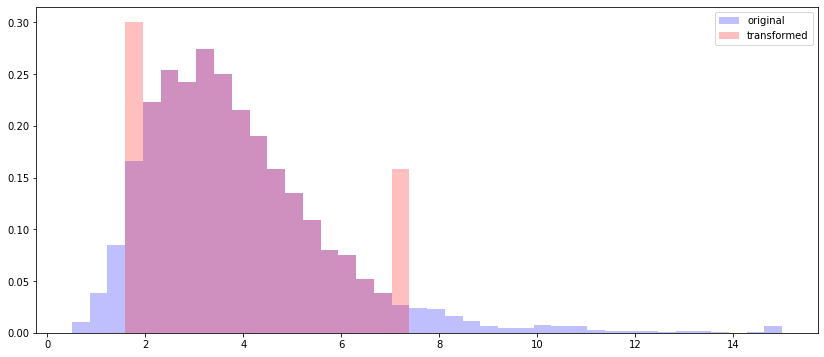

In [37]:
plt.figure(figsize=[14,6])
_, bins, _ = plt.hist(X[:, 0], density=True, bins=40, alpha=0.25, color='b')
plt.hist(Xt[:, 0], bins=bins, density=True, alpha=0.25, color='r')
plt.legend(['original', 'transformed']);

In [ ]:
#since transformation of the outliers forced the values lying outside of the boundaries to be pushed inside
#it creates spikes on the boundaries